# Plan for today:
* [THEORY] Overview of single qubit gates
* [THEORY] Qubit state representation on Bloch sphere
* [Qiskit] Analyzing and visualizing qubit state and operations on qubit
* [THEORY] Qubit state measurement
* [THEORY] Overview of 2-qubit gates. Multi-qubit gates
* [Qiskit] Analyzing multi-qubit states. Statevectors and operators.
* [Qiskit] Other visualizations in Qiskit
* Homework

## Qubit state representation on a Bloch sphere

In [10]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from math import sqrt, pi
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator

%matplotlib inline

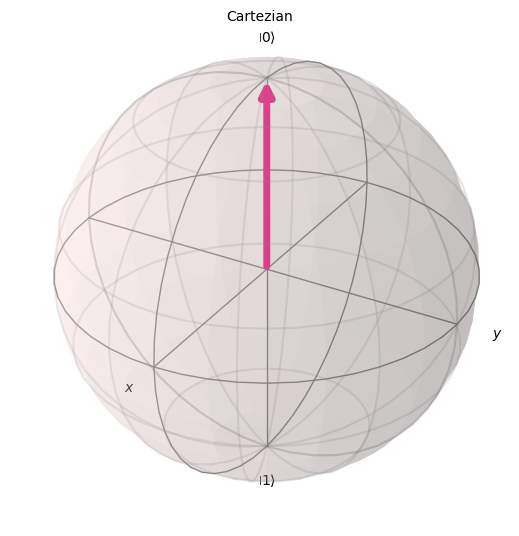

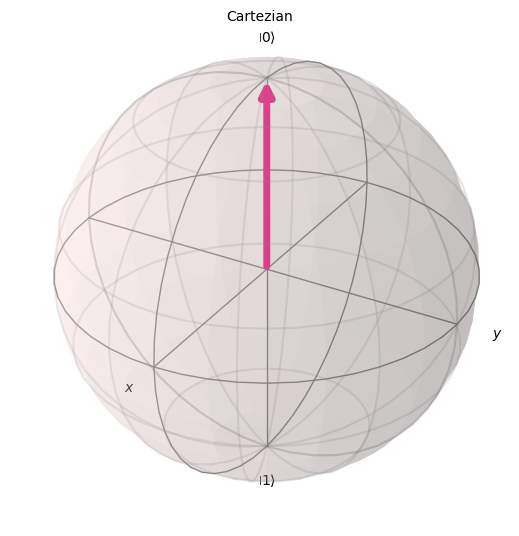

In [11]:
plot_bloch_vector([0,0,1], title="Cartezian") # Cartezian coordinates are the default

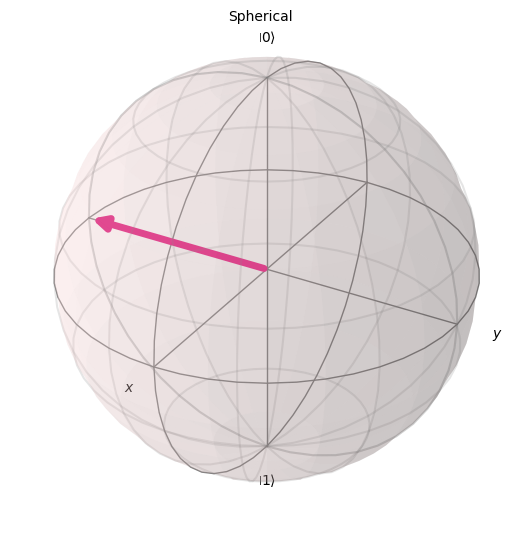

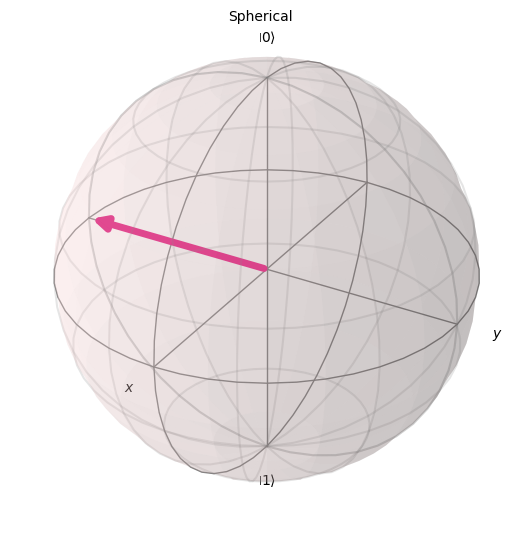

In [12]:
plot_bloch_vector([1,pi/2,3*pi/2], title="Spherical", coord_type='spherical') # [r,theta,phi]

In [50]:
qc = QuantumCircuit(1)
initial_state = [0,1]   # Define initial_state as |1>. Must be normalized!!!
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.h(0)
qc.draw()

┌─────────────────┐┌───┐
q: ┤ Initialize(0,1) ├┤ H ├
   └─────────────────┘└───┘

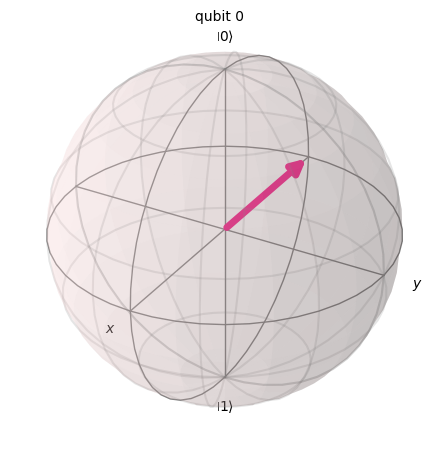

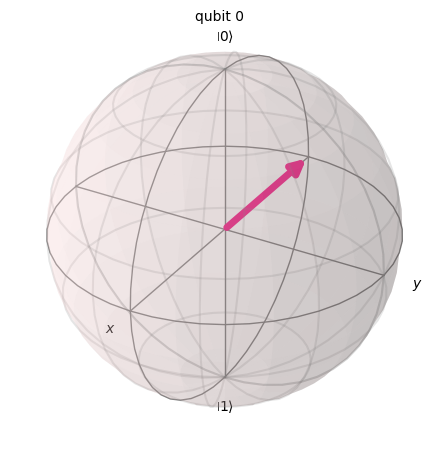

In [51]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## Exercise 3.1
Use plot_bloch_vector() to visualize a qubit in the state: $|\Psi\rangle=\frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$

### Animation of applying single qubit gates on Bloch sphere

* circuit needs to be just one qubit circuit
* spg = seconds per gate
* fpg = frames per gate
* trace - boolean if intermediate positions should be marked with dots

In [16]:
from qiskit.visualization import visualize_transition
from qiskit import *

qc = QuantumCircuit(1)
qc.h(0)

visualize_transition(qc, fpg=40, spg=2, trace=True)

/var/folders/p5/wx0ftqrd641f8zbzx80d2hc00000gn/T/ipykernel_96999/442435945.py:7: DeprecationWarning: The function ``qiskit.visualization.transition_visualization.visualize_transition()`` is deprecated as of Qiskit 1.2.0. It will be removed in the 2.0 release.
  visualize_transition(qc, fpg=40, spg=2, trace=True)


## Exercise 3.2
Using visualize_transition() function show that X = HZH

In [52]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)

state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

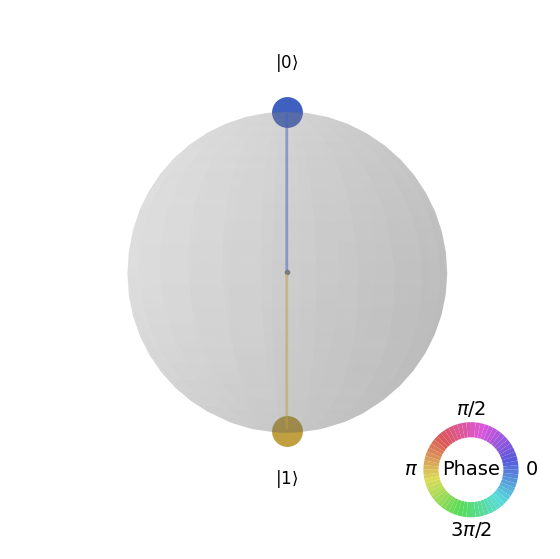

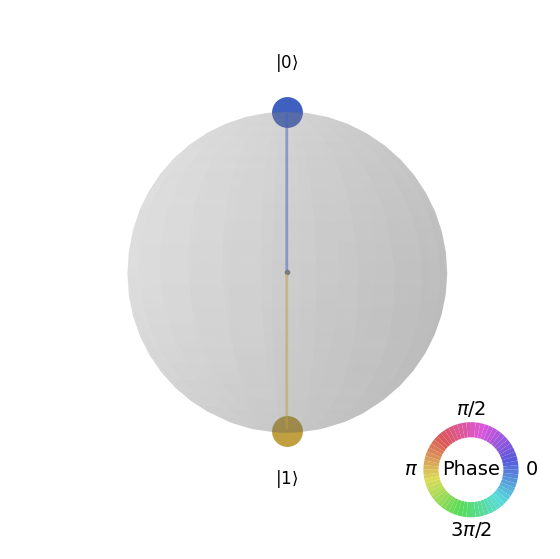

In [53]:
state.draw('qsphere')

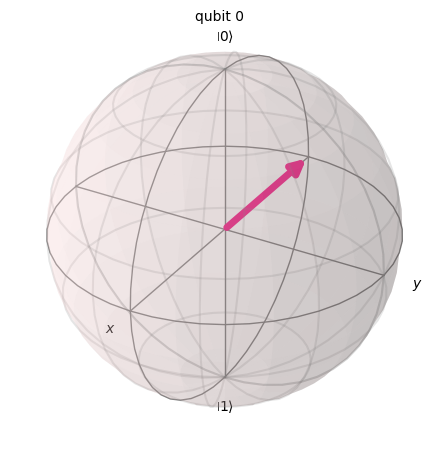

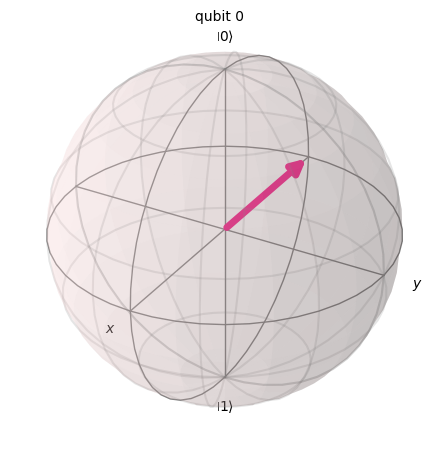

In [22]:
state.draw('bloch')

## Exercise 3.3
Visualize on QSphere the state HX|0>.
Analyze the phase information.

## Exercise 3.4
Using Qiskit, create a qubit in such state that, if measured, would with probability 1/3 give value 0 and with probability 2/3 value 1. Prove that state of your qubit fulfills the above requirement.

## Qubit state measurement

Theoretical inroduction.

We can measure the qubit state by projecting onto any direction going through middle of Bloch sphere.
But we have measurements alond X, Y and Z as the only three independent 'basic' measurements.

Source: Quantum Algorithm Implementations for Beginners (https://arxiv.org/abs/1804.03719), pg. 68

Physically IBM's quantumcomputers can measure along Z axis, but we can map any axis onto Z-axis and then measure.

Measuring a qubit also results in the destruction of quantum entanglement for that qubit

# Exercise 3.5
Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩

# Exercise 3.6
Use Qiskit to display the probability of measuring a |0⟩ qubit in the Y-basis

## Multi-qubit states representation

In [55]:
qc = QuantumCircuit(3)
qc.x(0)
qc.h(0)
#qc.rz(pi/2,0)
qc.draw()

state = Statevector.from_instruction(qc)
display(state.draw('latex', prefix="\\text{Statevector = }"))
display(state.draw('latex', prefix="|\Psi>="))
#display(state.draw('text'))
#display(state.draw('city'))
#display(state.draw('hinton'))
#display(state.draw('qsphere'))
#display(state.draw('bloch'))


<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
/var/folders/p5/wx0ftqrd641f8zbzx80d2hc00000gn/T/ipykernel_96999/3146002889.py:9: SyntaxWarning: invalid escape sequence '\P'
  display(state.draw('latex', prefix="|\Psi>="))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

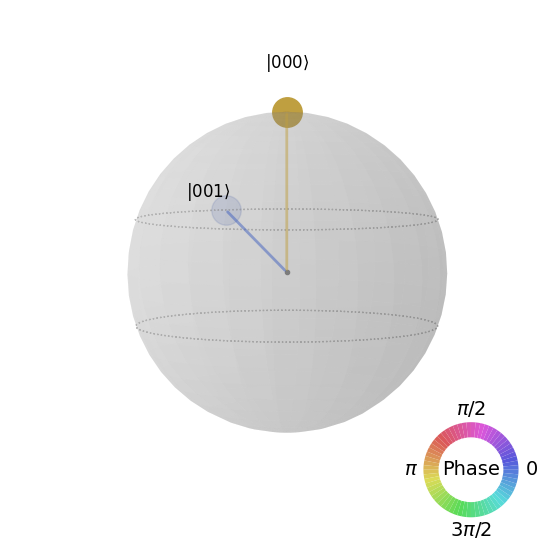

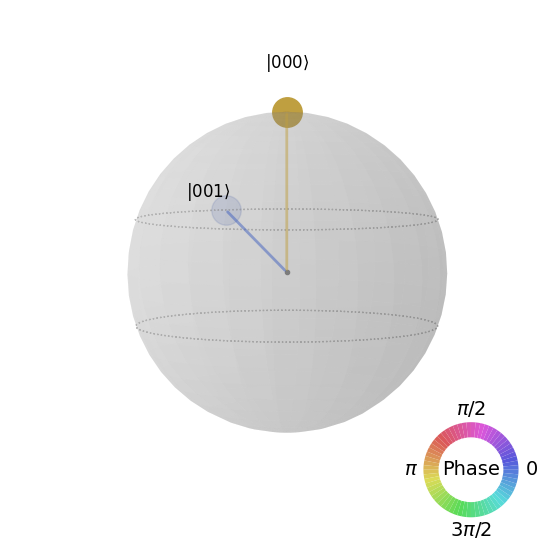

In [56]:
state.draw('qsphere')

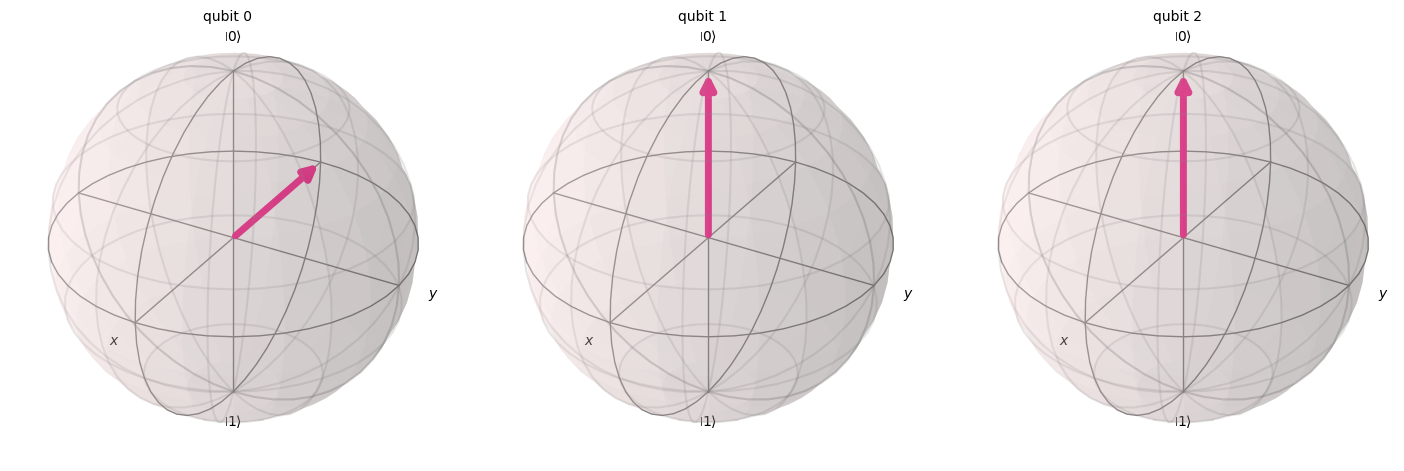

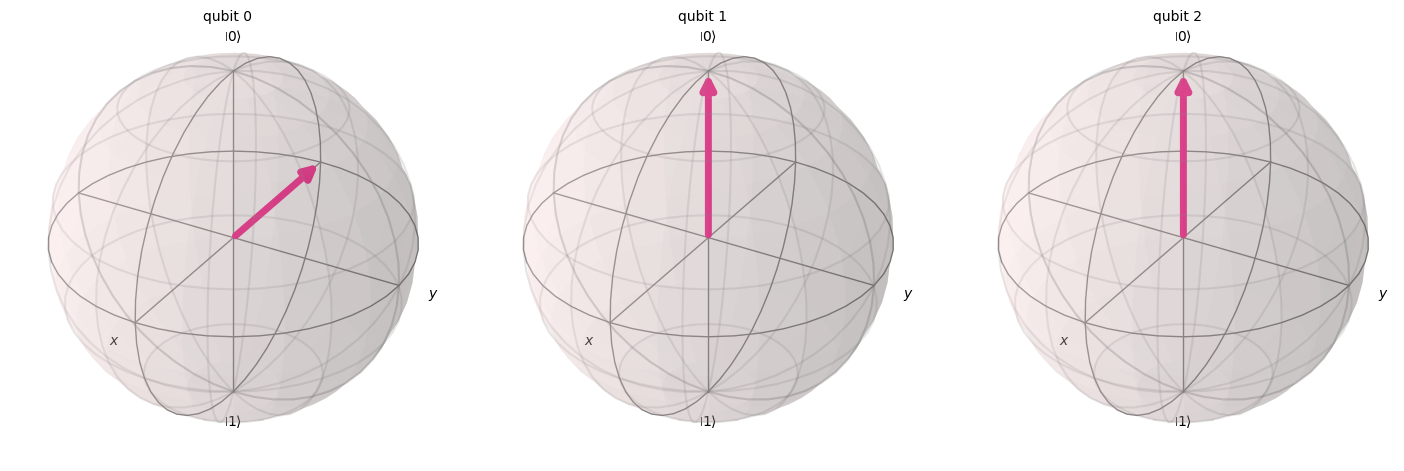

In [57]:
state.draw('bloch')

# Exercise 3.7
Visualize on QSphere and Bloch sphere:

a) following 2 qubit state $H|0\rangle H|0\rangle$ and 3 qubit state $H|0\rangle H|0\rangle H|0\rangle$

b) one of the the Bell states of 2 qubits and one of the GHZ states for 3 qubits introduced in Lab 1.


How do you interpret the results?

## Getting matrix representation of quantum gates:

In [69]:
from qiskit.quantum_info import Operator
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)


U = Operator(qc)

# Show the results
print(U.data)

[[ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [70]:
from qiskit.visualization import array_to_latex
array_to_latex(U.data)

<IPython.core.display.Latex object>

In [71]:
qc = QuantumCircuit(2)
qc.h(0)


state = Statevector.from_instruction(qc)
state.draw('latex')

<IPython.core.display.Latex object>

# Exercise 3.8
Using Qiskit show matrix representation for CNOT.
How the matrix representation changes when you reverse control and target qubits?

# Creating custom gates

In [72]:
my_circuit = QuantumCircuit(3, name="My gate")
my_circuit.cx(0,1)
my_circuit.cx(1,2)
my_circuit.cx(0,1)
my_circuit.cx(1,2)

my_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

In [73]:
my_gate = my_circuit.to_instruction()

In [74]:
new_circuit = QuantumCircuit(4)

new_circuit.append(my_gate, [0,1,2])

new_circuit.draw()

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1 My gate ├
     │          │
q_2: ┤2         ├
     └──────────┘
q_3: ────────────

## Homework: 
Do all the below on paper and bring it in 'hard copy' for the next class ;)
* Prove that points on opposite sites of Bloch sphere represent orthogonal quantum states. Explain why they are not geometrically orthogonal.
* Derive the most generic form of single qubit state with Bloch sphere angles.
* Prove that $\frac{1}{2}(1+\vec{\sigma_A}\vec{\sigma_B})$ represents a SWAP gate

Read (or watch the video of Jay Gambetta - it's at the end of teh page) the blog post on utility scale quantum computing: https://research.ibm.com/blog/100-qubit-utility?sf183103802=1